# Тест-кейс
1. Перед вами результаты участников эксперимента по мониторингу веса.
2. Посмотрите в каждом датасете первые 5 строк и последние 5 строк.
3. Посмотрите информацию о каждом датасете.
4. Проверьте датасеты на наличие дублей. Если дубли есть, то удалите их.
5. Переименуйте колонки в датасетах, чтобы они не содержали только строчные латинские буквы и символ "_".
6. Объедините датасеты по номеру участников
7. Посмотрите распределение по  полу и возрасту участников, постройте график распределений. Сделайте выводы об имеющейся выборке и напишите их в текстовом поле.
8. Посчитайте корреляцию между финальным весом и остальными параметрами датасета. Сделайте матрицу корреляции в виде графика. Ответьте на вопрос: какие факторы наиболее значимые для итогового веса?
9. Можете провести еще дополнительный анализ данных и сделать дополнительные выводы. Творческий подход приветствуется.

In [153]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [154]:
experiments = pd.read_csv('experiments.csv')
participants = pd.read_csv('participants.csv', sep=';')

In [155]:
experiments.head()

,Participant ID,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [156]:
experiments.tail()

,Participant ID,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
95,96,181.9,2622.8,3656.2,1033.4,0.60000,2,Lightly Active,Excellent,3,182.5
96,97,116.5,1736.5,2756.5,1020.0,-8.92309,12,Moderately Active,Good,9,107.6
97,98,162.7,2188.6,3344.3,1155.8,3.60000,12,Lightly Active,Fair,7,166.3
98,99,179.8,2671.9,4000.0,1328.1,2.00000,5,Moderately Active,Fair,5,181.8
99,100,185.2,2830.7,4000.0,1169.3,2.70000,9,Very Active,Fair,7,187.9


In [157]:
participants.head()

,Participant ID,Age,Gender
0,1,56,M
1,2,46,F
2,3,32,F
3,4,25,F
4,5,38,M


In [158]:
participants.tail()

,Participant ID,Age,Gender
95,96,59,M
96,97,56,F
97,98,58,F
98,99,45,M
99,100,24,M


In [159]:
experiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Current Weight (lbs)           100 non-null    float64
 2   BMR (Calories)                 100 non-null    float64
 3   Daily Calories Consumed        100 non-null    float64
 4   Daily Caloric Surplus/Deficit  100 non-null    float64
 5   Weight Change (lbs)            100 non-null    float64
 6   Duration (weeks)               100 non-null    int64  
 7   Physical Activity Level        100 non-null    object 
 8   Sleep Quality                  100 non-null    object 
 9   Stress Level                   100 non-null    int64  
 10  Final Weight (lbs)             100 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 8.7+ KB


In [160]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Participant ID  100 non-null    int64 
 1   Age             100 non-null    int64 
 2   Gender          100 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [161]:
experiments = experiments.rename(str.lower, axis='columns')
experiments.columns = experiments.columns.str.replace('\s', '_', regex=True).str.replace('[^_\w]', '', regex=True)
experiments = experiments.rename(columns={'daily_caloric_surplusdeficit': 'daily_caloric_surplus_or_deficit'})
participants = participants.rename(str.lower, axis='columns')
participants.columns = participants.columns.str.replace('\s', '_', regex=True)

In [162]:
experiments.columns

Index(['participant_id', 'current_weight_lbs', 'bmr_calories',
       'daily_calories_consumed', 'daily_caloric_surplus_or_deficit',
       'weight_change_lbs', 'duration_weeks', 'physical_activity_level',
       'sleep_quality', 'stress_level', 'final_weight_lbs'],
      dtype='object')

In [163]:
participants.columns

Index(['participant_id', 'age', 'gender'], dtype='object')

In [164]:
experiments = experiments.drop_duplicates()
participants = participants.drop_duplicates()

In [165]:
print(experiments.nunique(), '\n')
print(participants.nunique())

participant_id                      100
current_weight_lbs                   94
bmr_calories                        100
daily_calories_consumed              67
daily_caloric_surplus_or_deficit    100
weight_change_lbs                    71
duration_weeks                       12
physical_activity_level               4
sleep_quality                         4
stress_level                          9
final_weight_lbs                     97
dtype: int64 

participant_id    100
age                40
gender              2
dtype: int64


In [166]:
full_data = experiments.merge(participants, on='participant_id')

In [167]:
full_data.head()

,participant_id,current_weight_lbs,bmr_calories,daily_calories_consumed,daily_caloric_surplus_or_deficit,weight_change_lbs,duration_weeks,physical_activity_level,sleep_quality,stress_level,final_weight_lbs,age,gender
0,1,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6,56,M
1,2,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8,46,F
2,3,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2,32,F
3,4,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3,25,F
4,5,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5,38,M


In [168]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    100 non-null    int64  
 1   current_weight_lbs                100 non-null    float64
 2   bmr_calories                      100 non-null    float64
 3   daily_calories_consumed           100 non-null    float64
 4   daily_caloric_surplus_or_deficit  100 non-null    float64
 5   weight_change_lbs                 100 non-null    float64
 6   duration_weeks                    100 non-null    int64  
 7   physical_activity_level           100 non-null    object 
 8   sleep_quality                     100 non-null    object 
 9   stress_level                      100 non-null    int64  
 10  final_weight_lbs                  100 non-null    float64
 11  age                               100 non-null    int64  
 12  gender   

In [169]:
full_data['physical_activity_level'].unique()

array(['Sedentary', 'Very Active', 'Lightly Active', 'Moderately Active'],
      dtype=object)

In [170]:
d = {'Sedentary': 0, 'Lightly Active': 1, 'Moderately Active': 2, 'Very Active': 3}
full_data['physical_activity_level'] = full_data['physical_activity_level'].map(d)

In [171]:
full_data['sleep_quality'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [172]:
d = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
full_data['sleep_quality'] = full_data['sleep_quality'].map(d)

In [173]:
d = {'M': 0, 'F': 1}
full_data['gender'] = full_data['gender'].map(d)

In [174]:
new_dtypes = {'participant_id': 'int32',
              'current_weight_lbs': 'float32',
              'bmr_calories': 'float32',
              'daily_calories_consumed': 'float32',
              'daily_caloric_surplus_or_deficit': 'float32',
              'weight_change_lbs': 'float32',
              'duration_weeks': 'int32',
              'physical_activity_level': 'int32',
              'sleep_quality': 'int32',
              'stress_level': 'int32',
              'final_weight_lbs': 'float32',
              'age': 'int32',
              'gender': 'int32'
              }
full_data = full_data.astype(new_dtypes)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    100 non-null    int32  
 1   current_weight_lbs                100 non-null    float32
 2   bmr_calories                      100 non-null    float32
 3   daily_calories_consumed           100 non-null    float32
 4   daily_caloric_surplus_or_deficit  100 non-null    float32
 5   weight_change_lbs                 100 non-null    float32
 6   duration_weeks                    100 non-null    int32  
 7   physical_activity_level           100 non-null    int32  
 8   sleep_quality                     100 non-null    int32  
 9   stress_level                      100 non-null    int32  
 10  final_weight_lbs                  100 non-null    float32
 11  age                               100 non-null    int32  
 12  gender   

После нехитрых манипуляций с фреймом удалось снизить затраты памяти на его хранение практически в 2 раза.

---
Однако есть минусы, если качество сна и физическая активность становятся ранговыми признаками, с которыми всё интуитивно понятно, то в случае пола нужно перед началом работы с фреймом уточнять, что мужчины это 0, а женщины 1.

In [181]:
full_data['gender'].value_counts()

gender
0    57
1    43
Name: count, dtype: int64

In [191]:
full_data['age'].value_counts().sort_values(ascending=False).head(10)

age
41    6
25    5
56    4
42    4
32    4
38    4
31    4
24    4
19    4
46    3
Name: count, dtype: int64

In [179]:
full_data.loc[full_data.gender == 0].age.describe()

count    57.000000
mean     37.561404
std      12.889666
min      18.000000
25%      25.000000
50%      38.000000
75%      48.000000
max      59.000000
Name: age, dtype: float64

In [180]:
full_data.loc[full_data.gender == 1].age.describe()

count    43.000000
mean     38.372093
std      11.403891
min      19.000000
25%      29.500000
50%      38.000000
75%      45.500000
max      58.000000
Name: age, dtype: float64

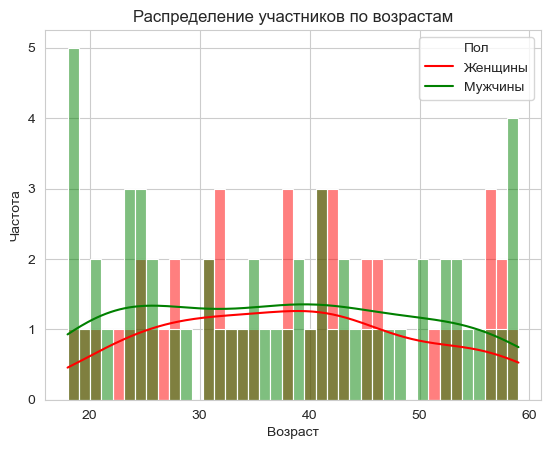

In [209]:
sns.histplot(data=full_data, x='age', hue='gender', palette=['green', 'red'], bins=40, kde=True)
plt.legend(title='Пол', labels=['Женщины', 'Мужчины'], loc='upper right')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение участников по возрастам')
plt.show()

<Axes: xlabel='gender', ylabel='age'>

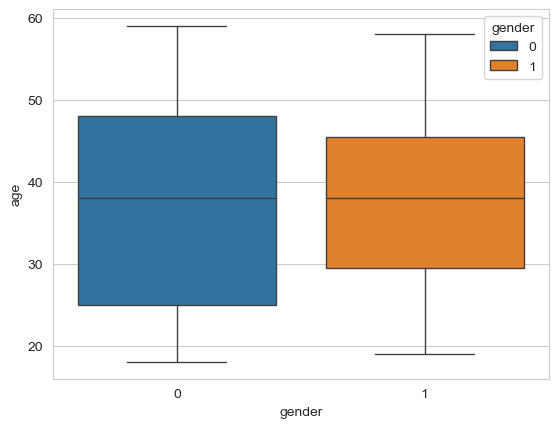

In [178]:
sns.boxplot(data=full_data, x='gender', y='age', hue='gender')

Можно предположить например, что мужчин и женщин на самом деле поровну и проверить с помощью хи-квадрат